In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from HOTS.Monitor import DisplaySurface2D, GenerateAM, DisplayAM, DisplayImage
from HOTS.STS import STS
from HOTS.Event import Event#, Filters
from HOTS.Cluster import CustomKmeans
from HOTS.Layer import FilterNHBD
from HOTS.Tools import SaveObject, LoadObject
import time

In [3]:
## Definition of the General parameters

In [4]:
SaveCluster = True
LoadCluster = True

ClusterFile = '../Records/ClusteringNotebook/Clusters.pkl'
tau = 0.02
R = 2
nb_cluster = 4
ImageSize = (32,32)

## Loading the events

In [5]:
image_list = [1, 32, 19, 22, 29]
event0 = Event(ImageSize=(32,32), ListPolarities=[-1,1])

event0.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=image_list)

InputFilter = FilterNHBD(threshold=15,neighbourhood=2)
event1 = InputFilter.RunFilter(event0)

chargement des images [1, 32, 19, 22, 29]


## Clustering the SpatioTemporal Surface with a Hierarchical Architecture

In [6]:
## Layer1

SpTe_Layer1= STS(tau=tau, R=R,verbose=1)
Surface_Layer1 = SpTe_Layer1.create(event = event1)
ClusterLayer1 = CustomKmeans(nb_cluster = nb_cluster, record_each=100, verbose=1)
Prototype1 = ClusterLayer1.fit(SpTe_Layer1)
event2,_ = ClusterLayer1.predict(STS=SpTe_Layer1,event = event1)

## Layer2
SpTe_Layer2= STS(tau=10*tau, R=2*R,verbose=1)
Surface_Layer2 = SpTe_Layer2.create(event = event2)
ClusterLayer2 = CustomKmeans(nb_cluster = nb_cluster*2, record_each=100, verbose=1)
Prototype2 = ClusterLayer2.fit(SpTe_Layer2)
event3,_ = ClusterLayer2.predict(STS=SpTe_Layer2,event = event2)

## Layer3
SpTe_Layer3= STS(tau=10*10*tau, R=2*2*R,verbose=1)
Surface_Layer3 = SpTe_Layer3.create(event = event3)
ClusterLayer3 = CustomKmeans(nb_cluster = nb_cluster*2*2, record_each=100, verbose=1)
Prototype3 = ClusterLayer3.fit(SpTe_Layer3)
event4,_ = ClusterLayer3.predict(STS=SpTe_Layer3,event = event3)

if SaveCluster == True :
    SaveObject([ClusterLayer1,ClusterLayer2,ClusterLayer3],ClusterFile)

Generation of SpatioTemporal Surface in ------ 1.10 s
Clustering SpatioTemporal Surface in ------ 13.07 s
Generation of SpatioTemporal Surface in ------ 1.38 s
Clustering SpatioTemporal Surface in ------ 17.45 s
Generation of SpatioTemporal Surface in ------ 3.11 s
Clustering SpatioTemporal Surface in ------ 62.56 s


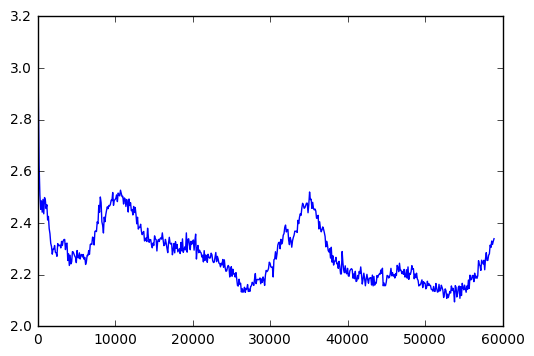

In [7]:
plt.plot(ClusterLayer1.record['error'])

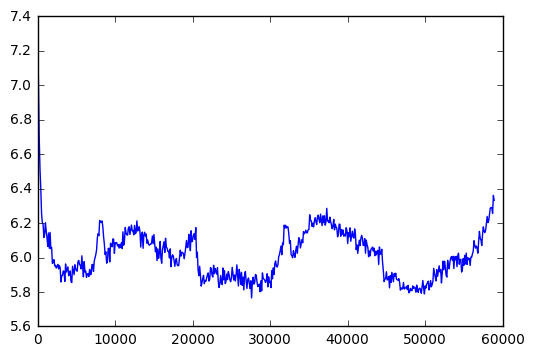

In [8]:
plt.plot(ClusterLayer2.record['error'])

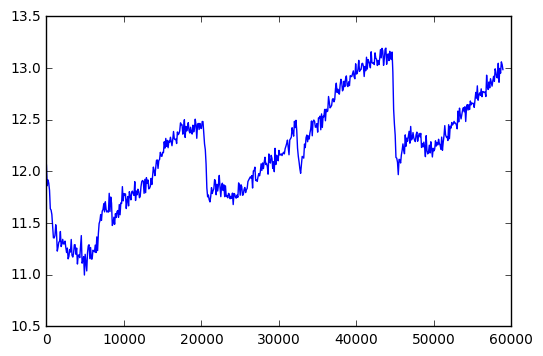

In [9]:
plt.plot(ClusterLayer3.record['error'])

In [ ]:
DisplaySurface2D(Prototype1,nb_polarities=2)

In [ ]:
DisplaySurface2D(Prototype2,nb_polarities=4)

In [ ]:
DisplaySurface2D(Prototype3,nb_polarities=8)

## Running the trained network on a single image

In [ ]:
if LoadCluster == True : 
    ClusterLayer1, ClusterLayer2, ClusterLayer3 = LoadObject(ClusterFile)

## Loading and filter an image of a 8
event0 = Event(ImageSize=(32,32),ListPolarities=[-1,1])
event0.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
InputFilter = FilterNHBD(threshold=15,neighbourhood=2)
event1 = InputFilter.RunFilter(event0)


#event_L1 = Event(); F = Filters(event_L1)
#address,time,polarity,event_nb = event_L1.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
#address_1,time_1,polarity_1,event_nb_1 = F.Neighbour(threshold=15, neighbourhood=2,image_size=(32,32))

## Layer1

SpTe_Layer1= STS(tau=tau, R=R,verbose=0)
Surface_Layer1 = SpTe_Layer1.create(event = event1)
#ClusterLayer1 = CustomKmeans(nb_cluster = nb_cluster,verbose=0)
#Prototype1 = ClusterLayer1.fit(SpTe_Layer1)
event2,_ = ClusterLayer1.predict(STS=SpTe_Layer1,event = event1)

## Layer2
SpTe_Layer2= STS(tau=10*tau, R=2*R,verbose=0)
Surface_Layer2 = SpTe_Layer2.create(event = event2)
#ClusterLayer2 = CustomKmeans(nb_cluster = nb_cluster*2, verbose=0)
#Prototype2 = ClusterLayer2.fit(SpTe_Layer2)
event3,_ = ClusterLayer2.predict(STS=SpTe_Layer2,event = event2)

## Layer3
SpTe_Layer3= STS(tau=10*10*tau, R=2*2*R,verbose=0)
Surface_Layer3 = SpTe_Layer3.create(event = event3)
#ClusterLayer3 = CustomKmeans(nb_cluster = nb_cluster*2*2, verbose=0)
#Prototype3 = ClusterLayer3.fit(SpTe_Layer3)
event4,_ = ClusterLayer3.predict(STS=SpTe_Layer3,event = event3)

#### Activation map for Layer1

In [ ]:
mapL1 = GenerateAM(event2,ClusterLayer1)
DisplayAM(mapL1)

In [ ]:
mapGlobal_L1 = GenerateAM(event2,ClusterLayer1,mode='global')
plt.imshow(mapGlobal_L1,cmap=plt.hsv())

#### Activation map for Layer2

In [ ]:
mapL2 = GenerateAM(event3,ClusterLayer2)
DisplayAM(mapL2)

In [ ]:
mapGlobal_L2 = GenerateAM(event3,ClusterLayer2,mode='global')
plt.imshow(mapGlobal_L2,cmap=plt.hsv())

#### Activation map for Layer3

In [ ]:
mapL3 = GenerateAM(event4,ClusterLayer3)
DisplayAM(mapL3)

In [ ]:
mapGlobal_L3 = GenerateAM(event4,ClusterLayer3,mode='global')
plt.imshow(mapGlobal_L3,cmap=plt.hsv())